# CMPINF0010 - Final Project

## Group Name: The Dynamic Duo (Qizhe Wang & Rohaan Wasim)

## Introduction

For this project, we chose some metrics to judge neighborhoods by and decided on which neighborhood is the best. We decided to focus on three crucial aspects of all neighborhoods: school enrollment, crime rates, and poverty rates. While searching for metrics to judge neighborhoods by, we found many datasets that focused on specific attributes, such as air quality, number of polling places. However, we felt these datasets were too specific and did not attest to a fundamental characteristic of the neighborhood's culture and people. We also discovered to our dismay that some datasets were not categorized by neighborhood. Additionally, we found some good datasets but decided not to use them because they were old (Criteria: if a dataset was made/updated more than 10 years ago, it was considered "old" and thus not viable). The dataset determined what our metric would be, so we chose datasets that cover a general category and cover aspects that have tangible impacts on the neighborhoods. 

## The Metric

Our metrics were well defined in the context of the data in our datasets. For example, the School Enrollment dataset detailed the enrollment numbers from Pre-K - Graduate school for all neighborhoods and even provided a Margin of Error. This made extracting the relevant information simple which allowed us to incorporate other datasets to augment/justify our metrics. Here is an overview of our metrics and datasets:
- Rohaan
    * Metric: School Enrollment
    * Pittsburgh Community Survey 2015, School Enrollment - School Enrollment, All Races: Contains estimates and margins of error for the total population, total school enrollment, enrollment by level from Pre-Kindergarten to Graduate school, and unenrolled population for 91 neighborhoods in the Pittsburgh Area for 2015.
    * Pittsburgh Community Survey 2015, Miscellaneous Data - Total Population: Contains estimates and margin of errors for the population values for 91 neighborhoods in the Pittsburgh Area for 2015. 
- Qizhe   
    * Metric: Crime and Poverty
    * Police Incident Blotter- This data contains crime incident data from 2005 to present
    * Pittsburgh Police Arrest Data - this data contains information on people taken into custody by City of Pittsburgh police officers
    * Poverty Status of Individuals in the Past 12 Months - this data includes Poverty Status of Individuals in the Past 12 Months by Living Arrangements

**School Enrollment:** The School Enrollment metric measures the total number of students enrolled in primary and secondary education (Pre-Kindergarten - 12th Grade) and takes into consideration population size. The best neighborhood will have the number of students enrolled in school proportional the size of its population. Each neighborhood will receive 1 point for every student enrolled in Pre-Kindergarten - 12th grade. The total number of points is then divided by the total population in order to account for population differences in neighborhoods and not penalize neighborhoods with smaller enrollment numbers that are due primarily to a smaller population. I multiply the result by 1000 in order to make the result more readable and to make comparing easier.

The Scoring Formula is as follows:

    Enrollment = (Total # of Students Enrolled - (# of Students In College + # of Students In Graduate School))
    Population = Total Population 
    Score = (Enrollment/Population) * 1000
The dataset contains an "Estiamte; Enrolled in school:" column that includes all students in primary, secondary, and post-secondary education, so it is necessary to subtract the post-secondary education values in order to only consider Pre-Kindergarten to 12th Grade. I am excluding college and beyond becaue, for colleges located in a neighborhood, the dataset does not differentiate between college students originally from the neighborhood and college students who come from different neighborhoods. This distinction is necessary in order to quantify the percentage of students in a neighborhood that go to college.
<br />
<br />

**Crime:** The crime metric is based on the crime rate and arrest rate. We calculated the crime rate by dividing total crimes(2005-present) by population(total crimes/population), and calculated the arrest rate by dividing the total arrests by population(arrest rate = arrests/population).  Note: For both dataset, those neighborhoods with less than 300 people are removed as outliers. Arrests dataset only cover all the arrests from 2016-present.
<br />
<br />

**Poverty Level:** The poverty metric is based on the poverty rate of each neighborhood. We use the dataset "Poverty Status of Individuals in the Past 12 Months" to find out the total number of individuals that are under poverty level, and then we divide it by the population of the neighborhood. Note: those neighborhoods with less than 300 people are removed as outliers, and the dataset is last updated on August 29,2017.

## THE CODE AND DATA

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### School enrollment

In [ ]:
#Reading in the School Enrollment data
school_enrollment = pd.read_csv("https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv",  index_col = "Neighborhood")
plt.style.use("default")

Lets get a picture of the data we are working with:

In [ ]:
school_enrollment.count()

Id                                                                                 91
Estimate; Total:                                                                   91
Margin of Error; Total:                                                            91
Estimate; Enrolled in school:                                                      91
Margin of Error; Enrolled in school:                                               91
Estimate; Enrolled in school: - Enrolled in nursery school, preschool              91
Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool       91
Estimate; Enrolled in school: - Enrolled in kindergarten                           91
Margin of Error; Enrolled in school: - Enrolled in kindergarten                    91
Estimate; Enrolled in school: - Enrolled in grade 1                                91
Margin of Error; Enrolled in school: - Enrolled in grade 1                         91
Estimate; Enrolled in school: - Enrolled in grade 2   

So it seems there are 91 neighborhoods in the dataset that we need to rank. However, there is a problem... 

It is highly probable that the places with much higher estimates also have much larger populations which implicitly gives them a massive advantage. We want to determine the number of students enrolled in school in proportion to the population to see how much of the population is pusuing education. The ideal way to do this is to divide the Total Enrollment (excluding college and graduate/professional school) by the Total Population. Fortuantely, the School-Enrollment dataset contains the estimated population sizes for each neighborhood in the "Estimate; Total:" column. But how can we be sure this vaguely named column does indeed contain each neighborhood's population values?

The answer is to compare it to the WPRDC's Total Population dataset. The "total-population.csv" is a dataset from the WPRDC that contains population figures for neighborhoods in Pittsburgh. The column name, "Estimate; Total", in the total population dataset is very similar to the column name in the School Enrollment dataset:

In [ ]:
population_dataset = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
population_dataset.head(10)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


For further proof and to verify that the School Enrollment dataset does indeed contain total population column, lets graph the School Enrollment and Total Population's Total Estimate Columns for a visual comparion:

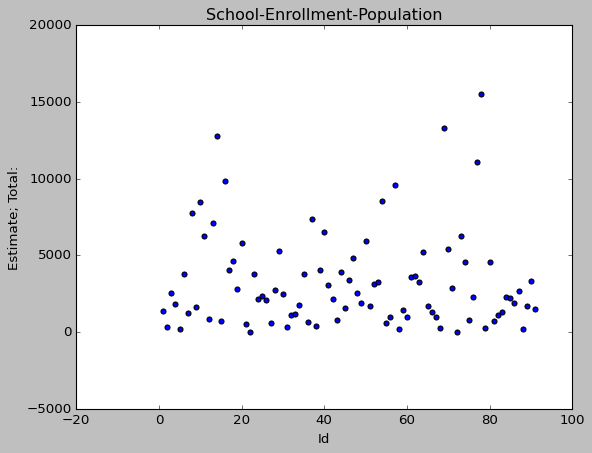

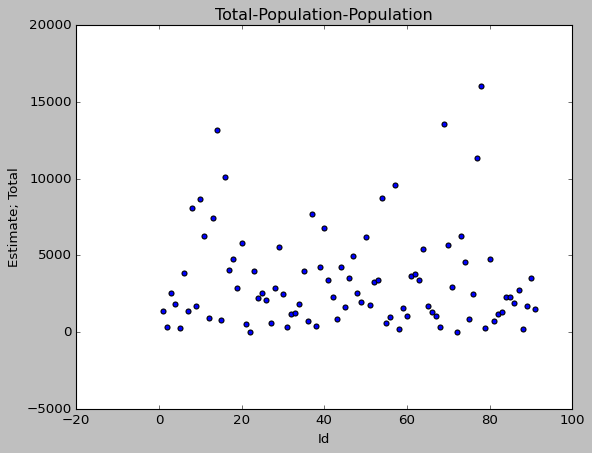

In [ ]:
plt.style.use("classic")
school_enrollment.plot.scatter(x = "Id", y= "Estimate; Total:", title = "School-Enrollment-Population")
population_dataset.plot.scatter(x = "Id", y= "Estimate; Total", title = "Total-Population-Population")

Just by looking at the graphs you can tell the values are almost identical. This verifies that the "Estimate; Total:" column in the School-Enrollment dataset does indeed contain the estimated total population for each neighborhood.

Now that it has been proven that the School-Enrollment dataset has access to the estimated total populations for each neighborhood for the year 2015, it is time to calculate the scores. Since my scoring system gives points for school enrollment and controls for population size, the scores should give a good picture of the relative school enrollment in each neighborhood:

In [ ]:
Enrollment = school_enrollment["Estimate; Enrolled in school:"]-(school_enrollment["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + school_enrollment["Estimate; Enrolled in school: - Graduate or professional school"])
Population = school_enrollment["Estimate; Total:"]
school_enrollment["Points"] = (Enrollment/Population) * 1000
school_enrollment["Points"].head(20)

Neighborhood
Allegheny Center             138.948884
Allegheny West                99.125364
Allentown                    303.968254
Arlington                    147.558969
Arlington Heights            131.455399
Banksville                    73.937153
Bedford Dwellings            250.199840
Beechview                    130.501931
Beltzhoover                  121.814792
Bloomfield                    59.896446
Bluff                         13.992686
Bon Air                      247.139588
Brighton Heights             156.364147
Brookline                    160.835877
California-Kirkbride         151.556157
Carrick                      171.094148
Central Business District     17.091900
Central Lawrenceville         58.456910
Central Northside            151.697313
Central Oakland                7.385778
Name: Points, dtype: float64

The scores vary quite a bit, but the first 20 entries show a few neighborhoods with high populations that have low scores (Ex. Central Oakland, Bluff) which means that the scores were adjusted for population size. Sorting the results and determining the best neighborhood:

In [ ]:
neighborhoods_sorted = school_enrollment.sort_values(by = "Points", ascending = False)
neighborhoods_sorted["Points"]

Neighborhood
Homewood North       320.458265
Allentown            303.968254
Northview Heights    299.174691
Knoxville            296.089385
Elliott              293.354943
                        ...    
Central Oakland        7.385778
South Shore            0.000000
Ridgemont              0.000000
West End               0.000000
Chateau                0.000000
Name: Points, Length: 91, dtype: float64

#### Homewood North is the winner with the highest score of 320.46!

#### Graphing the Results:

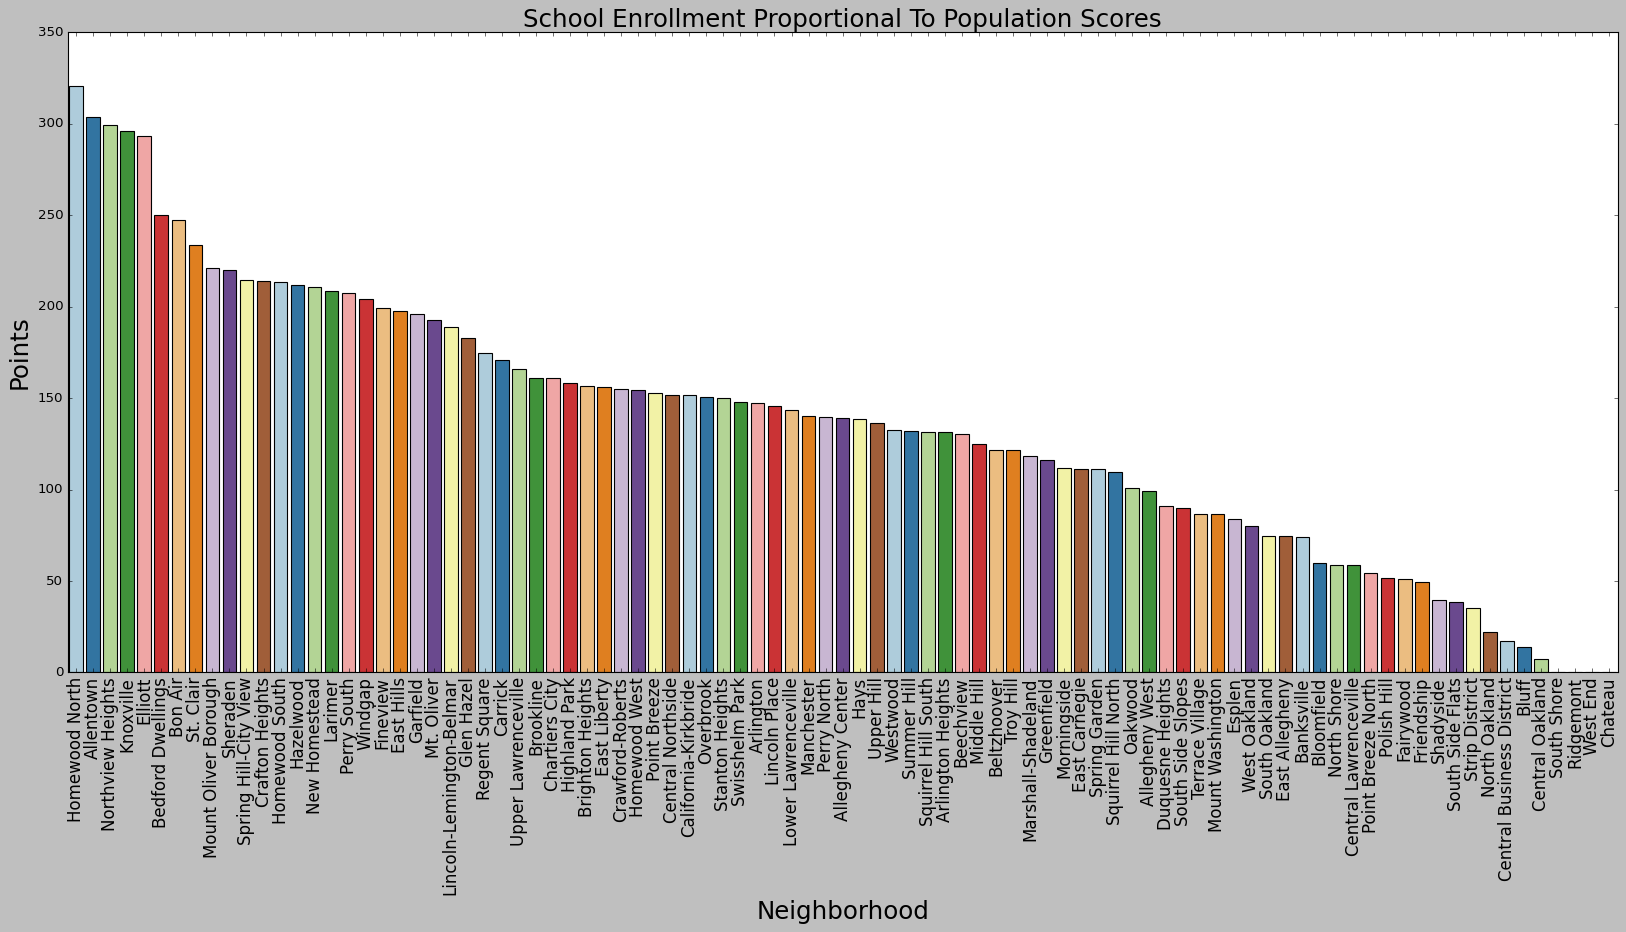

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,size=15)
plt.title("School Enrollment Proportional To Population Scores", size=22)
plt.xlabel("Neighborhood",size=22)
plt.ylabel("Points",size=22)
#Since the dataset is indexed by Neighborhood, "Neighborhood" needs to be added as a column
neighborhoods_sorted["Neighborhood"] = neighborhoods_sorted.index
g=sns.barplot(x = "Neighborhood", y = "Points", data = neighborhoods_sorted, palette="Paired")

In [ ]:
#Assigning Score values to each neighborhood for the final evaluation.
neighborhoods_sorted["Score(School Enrollment)"] = range(100,100-len(neighborhoods_sorted),-1)
neighborhoods_sorted["Score(School Enrollment)"]

Neighborhood
Homewood North       100
Allentown             99
Northview Heights     98
Knoxville             97
Elliott               96
                    ... 
Central Oakland       14
South Shore           13
Ridgemont             12
West End              11
Chateau               10
Name: Score(School Enrollment), Length: 91, dtype: int64

### Crime

In [ ]:
# Read data from WPRDC
crimeData = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e")
Popuplation = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")

# find out the number of crime in each neighborhood
crimeNumber = pd.DataFrame(crimeData.INCIDENTNEIGHBORHOOD.value_counts())

# Simplify the population dataset
PopuplationA= Popuplation[["Neighborhood","Estimate; Total"]]

# change column name and index
crimeNumber.columns = ["Crime number"]
crimeNumber["Neighborhood"] = crimeNumber.index
crimeNumber.index = range(1,len(crimeNumber)+1)
crimeNumber = crimeNumber[["Neighborhood","Crime number"]]

# put the population and the crime number in one dataframe
crimeRate = pd.merge(crimeNumber,PopuplationA,on = "Neighborhood")

# calculate the crime rate (total crime number/population) and add the "crime rate" column to the dataframe
crimeRate["Crime rate"] = crimeRate["Crime number"]/crimeRate["Estimate; Total"]
crimeRate = crimeRate[["Neighborhood","Crime number","Estimate; Total","Crime rate"]]

# filter out the neighborhood that has less than 300 people sort the dataset by crime rate
crimeRate = crimeRate[crimeRate["Estimate; Total"]>300].sort_values(by=['Crime rate'])
# Renaming column
crimeRate.columns = ["Neighborhood","Crime number","Population","Crime rate"]
# Give each neighborhood a score based on their ranking
crimeRate["Score"] = range(100,100-len(crimeRate),-1)



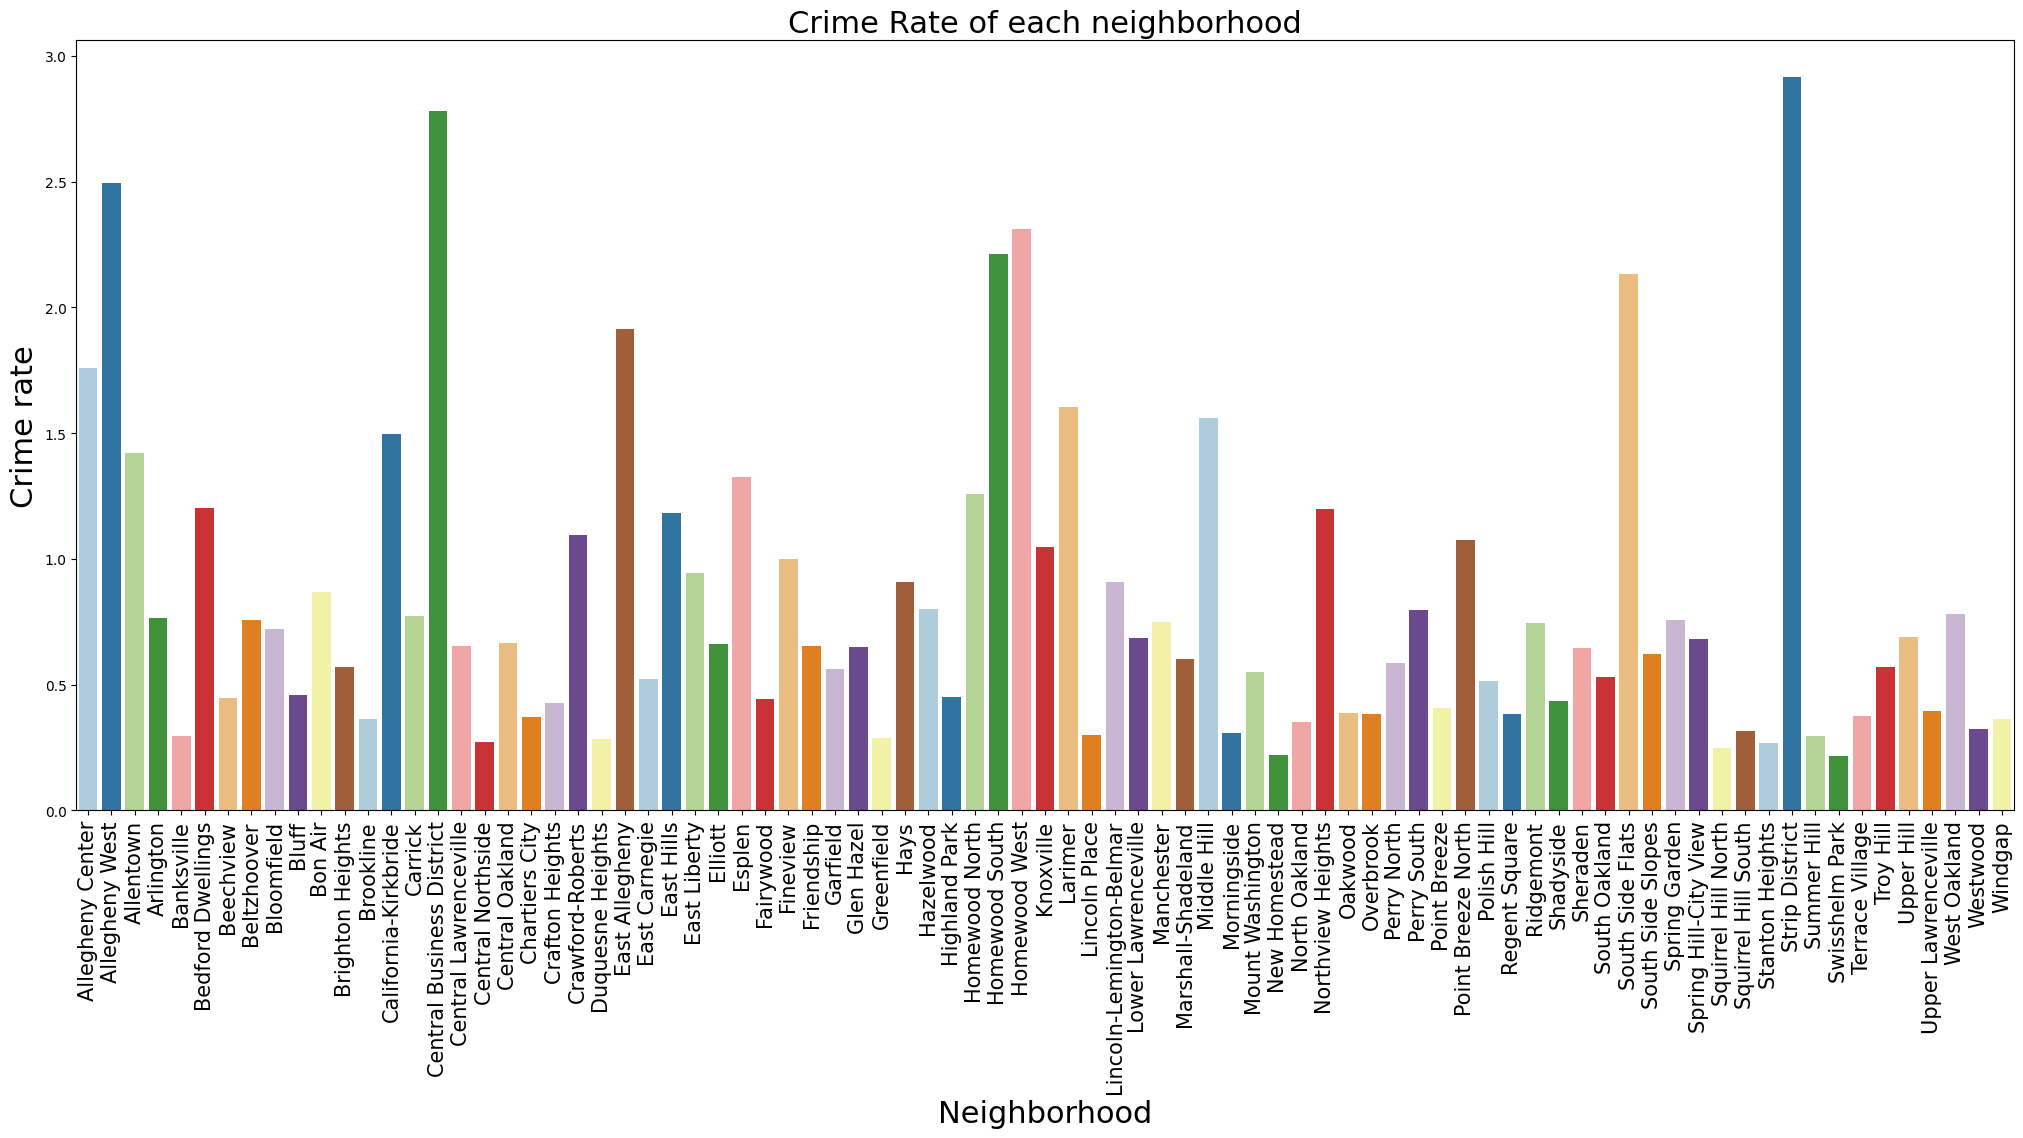

In [ ]:
# visualize the crime rate 
plt.style.use("default")
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,size=15)
plt.title("Crime Rate of each neighborhood", size=22)
plt.xlabel("Neighborhood",size=22)
plt.ylabel("Crime Rate",size=22)
g=sns.barplot(x="Neighborhood", y = "Crime rate", data = crimeRate.sort_values(by="Neighborhood"), palette="Paired")

In [ ]:
crimeRate.head(10)

,Neighborhood,Crime number,Population,Crime rate,Score
85,Swisshelm Park,292,1345.0,0.217100,100
87,New Homestead,216,973.0,0.221994,99
27,Squirrel Hill North,2818,11336.0,0.248589,98
56,Stanton Heights,1271,4761.0,0.266961,97
70,Central Northside,786,2892.0,0.271784,96
71,Duquesne Heights,712,2522.0,0.282316,95
35,Greenfield,2218,7690.0,0.288427,94
61,Banksville,1134,3858.0,0.293935,93
82,Summer Hill,352,1191.0,0.295550,92
63,Lincoln Place,1044,3499.0,0.298371,91


In [ ]:
# Read the arrrest data from WPRDC
arrest = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f")

# Get the number of arrests of each neighborhood
arrests = pd.DataFrame(arrest.INCIDENTNEIGHBORHOOD.value_counts())
arrests.columns = ["Arrests"]
arrests["Neighborhood"] = arrests.index
arrests.index = range(1,len(arrests)+1)
arrests = arrests[["Neighborhood","Arrests"]]

# put the population and the arrest number into one dataframe
arrestRate = pd.merge(arrests,PopuplationA,on = "Neighborhood")

# calculate the arrest rate of each neighborhood
arrestRate["Arrest rate"] = arrestRate["Arrests"]/arrestRate["Estimate; Total"]

# filter out the neighborhoods with less than 300 people.
arrestRate = arrestRate[arrestRate["Estimate; Total"]>300].sort_values(by=['Arrest rate'])

arrestRate.columns = ["Neighborhood","Arrests", "Population", "Arrest rate"]
# combine1 = combine1.sort_values(by = "arrested rate")
arrestRate["Score"] = range(100,100-len(arrestRate),-1)


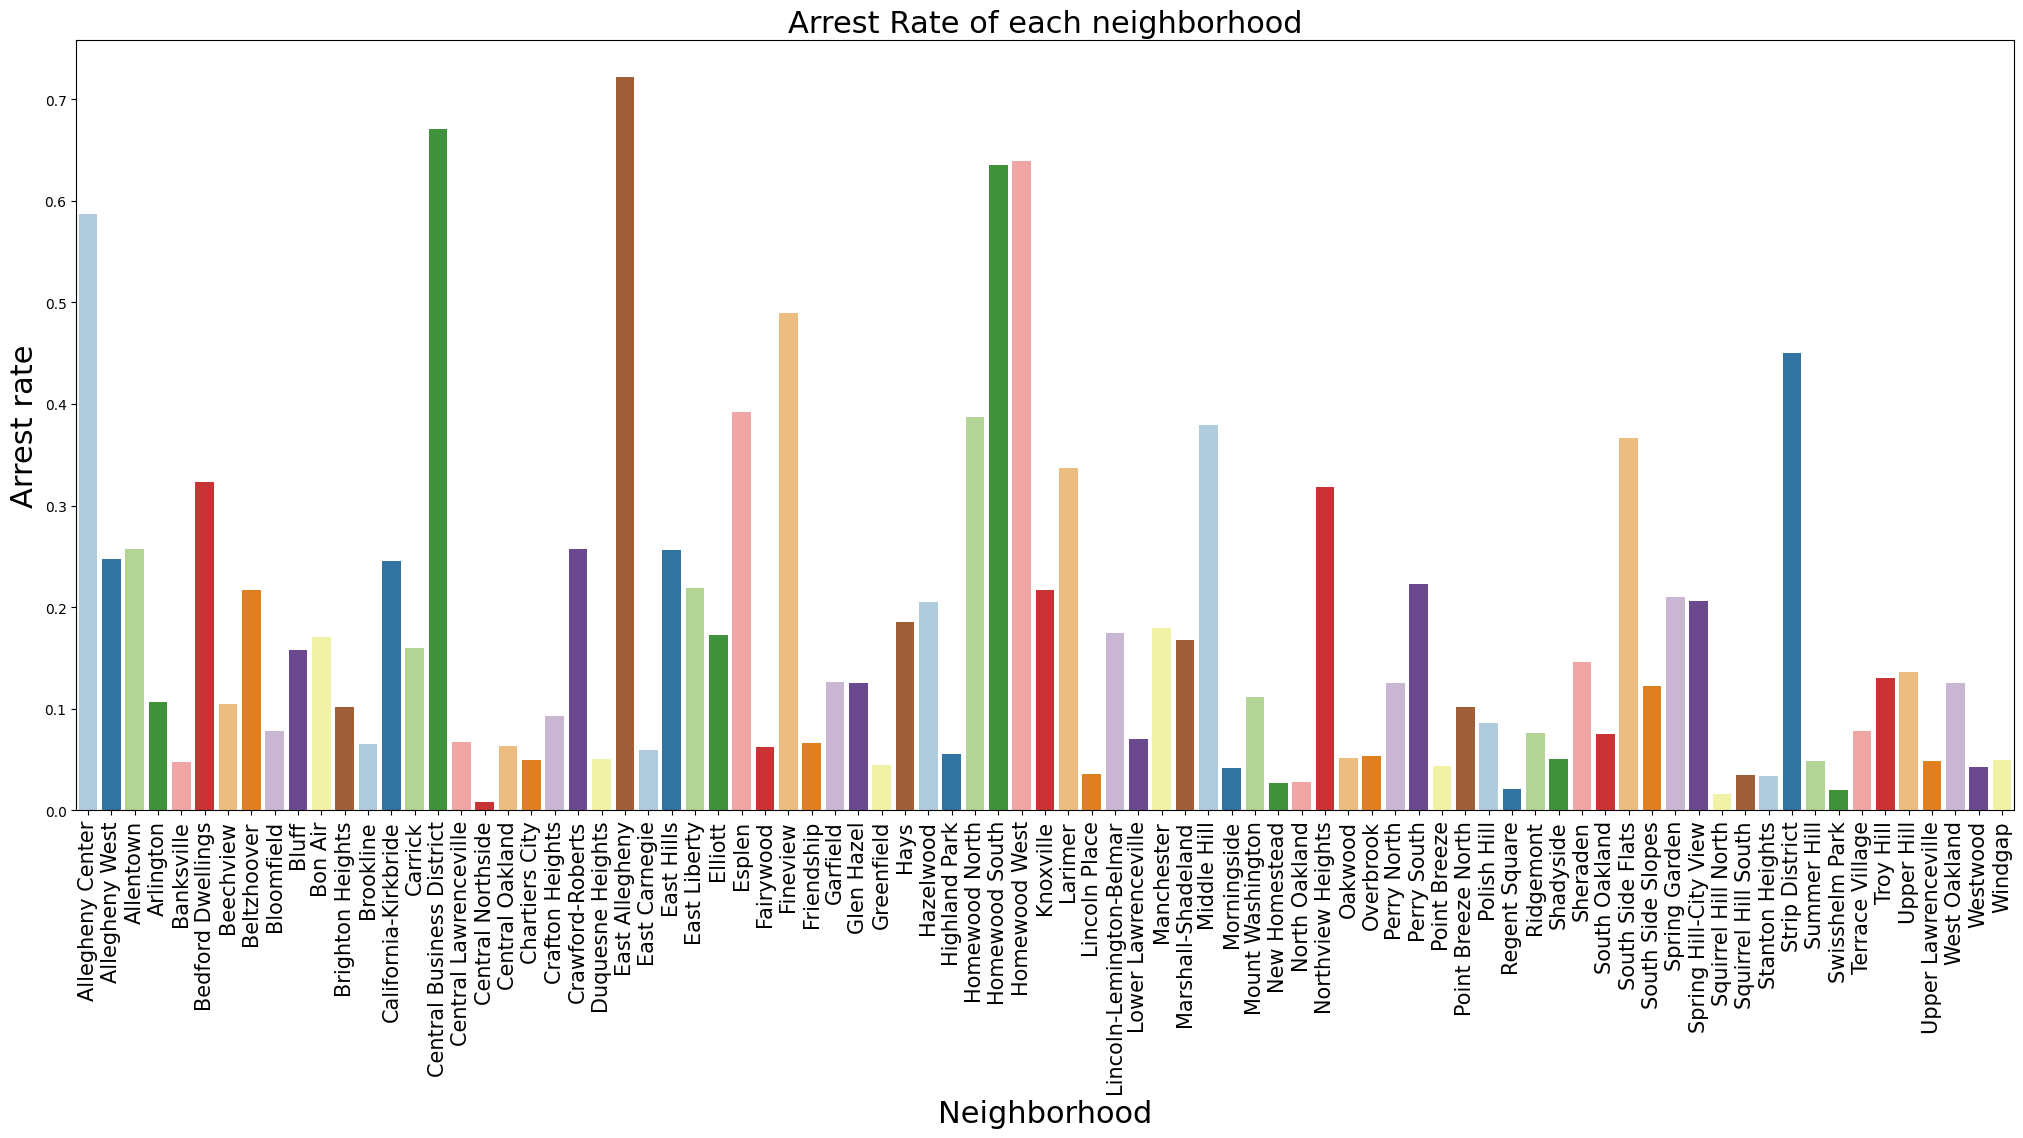

In [ ]:
# visualize the arrest rate 

plt.figure(figsize=(25,10))
plt.xticks(rotation=90,size=15)
plt.xlabel("Neighborhood",size=22)
plt.ylabel("Arrest Rate",size=22)
plt.title("Arrest Rate of each neighborhood", size=22)
g=sns.barplot(x="Neighborhood", y = "Arrest rate", data = arrestRate.sort_values(by="Neighborhood"), palette="Paired")

In [ ]:
arrestRate.head(10)

,Neighborhood,Arrests,Population,Arrest rate,Score
87,Central Northside,23,2892.0,0.007953,100
57,Squirrel Hill North,185,11336.0,0.016320,99
84,Swisshelm Park,27,1345.0,0.020074,98
88,Regent Square,22,1033.0,0.021297,97
85,New Homestead,26,973.0,0.026721,96
47,North Oakland,271,9602.0,0.028223,95
63,Stanton Heights,160,4761.0,0.033606,94
27,Squirrel Hill South,554,16042.0,0.034534,93
69,Lincoln Place,124,3499.0,0.035439,92
66,Morningside,136,3262.0,0.041692,91


In [ ]:
# Combine two scores to get the final score
crime = pd.merge(crimeRate.sort_index(),arrestRate.sort_index(),on = "Neighborhood")
crime["Score(Crime)"] = (crime["Score_x"]+crime["Score_y"])/2
sortedCrime = crime[["Neighborhood","Population_x","Crime rate","Arrest rate","Score_x","Score_y","Score(Crime)"]].sort_values(by=["Score(Crime)"],ascending=False)
sortedCrime.columns = ["Neighborhood","Population_x","Crime rate","Arrest rate","Score(Crime rate)","Score(Arrest rate)","Score(Crime)"]
sortedCrime.head(10)

,Neighborhood,Population_x,Crime rate,Arrest rate,Score(Crime rate),Score(Arrest rate),Score(Crime)
79,Swisshelm Park,1345.0,0.217100,0.020074,100,98,99.0
27,Squirrel Hill North,11336.0,0.248589,0.016320,98,99,98.5
66,Central Northside,2892.0,0.271784,0.007953,96,100,98.0
81,New Homestead,973.0,0.221994,0.026721,99,96,97.5
54,Stanton Heights,4761.0,0.266961,0.033606,97,94,95.5
61,Lincoln Place,3499.0,0.298371,0.035439,91,92,91.5
34,Greenfield,7690.0,0.288427,0.044343,94,88,91.0
6,Squirrel Hill South,16042.0,0.315796,0.034534,89,93,91.0
22,North Oakland,9602.0,0.349719,0.028223,87,95,91.0
62,Morningside,3262.0,0.309013,0.041692,90,91,90.5


### Poverty Rate

In [ ]:
# Read data from WPRDC
povertyData = pd.read_csv("https://data.wprdc.org/dataset/c6265ffb-c86e-4a2c-870b-1aaa0772c449/resource/7996d143-c155-466e-8414-115f74997dd7/download/poverty-status-of-individuals-in-the-past-12-months-by-living-arrangement.csv")
#Simplify the dataset
poverty = povertyData[["Neighborhood","Estimate; Total:","Estimate; Income in the past 12 months below poverty level:"]]

poverty.columns = ["Neighborhood", "Population","Income below poverty level:"]


#Filter out the neighborhood that has less than 300 people
poverty=poverty[poverty['Population']>300]

#Calculate the poverty rate
poverty["Poverty rate(%)"] = poverty["Income below poverty level:"]*100/poverty["Population"]
poverty.sort_values(by="Poverty rate(%)").head(10)

,Neighborhood,Population,Income below poverty level:,Poverty rate(%)
82,Swisshelm Park,1286.0,51.0,3.965785
55,New Homestead,933.0,42.0,4.501608
80,Strip District,689.0,33.0,4.789550
5,Banksville,3944.0,252.0,6.389452
66,Regent Square,1009.0,67.0,6.640238
81,Summer Hill,1168.0,81.0,6.934932
63,Point Breeze,5333.0,442.0,8.288018
45,Lincoln Place,3465.0,293.0,8.455988
90,Windgap,1617.0,147.0,9.090909
36,Greenfield,7465.0,682.0,9.135968


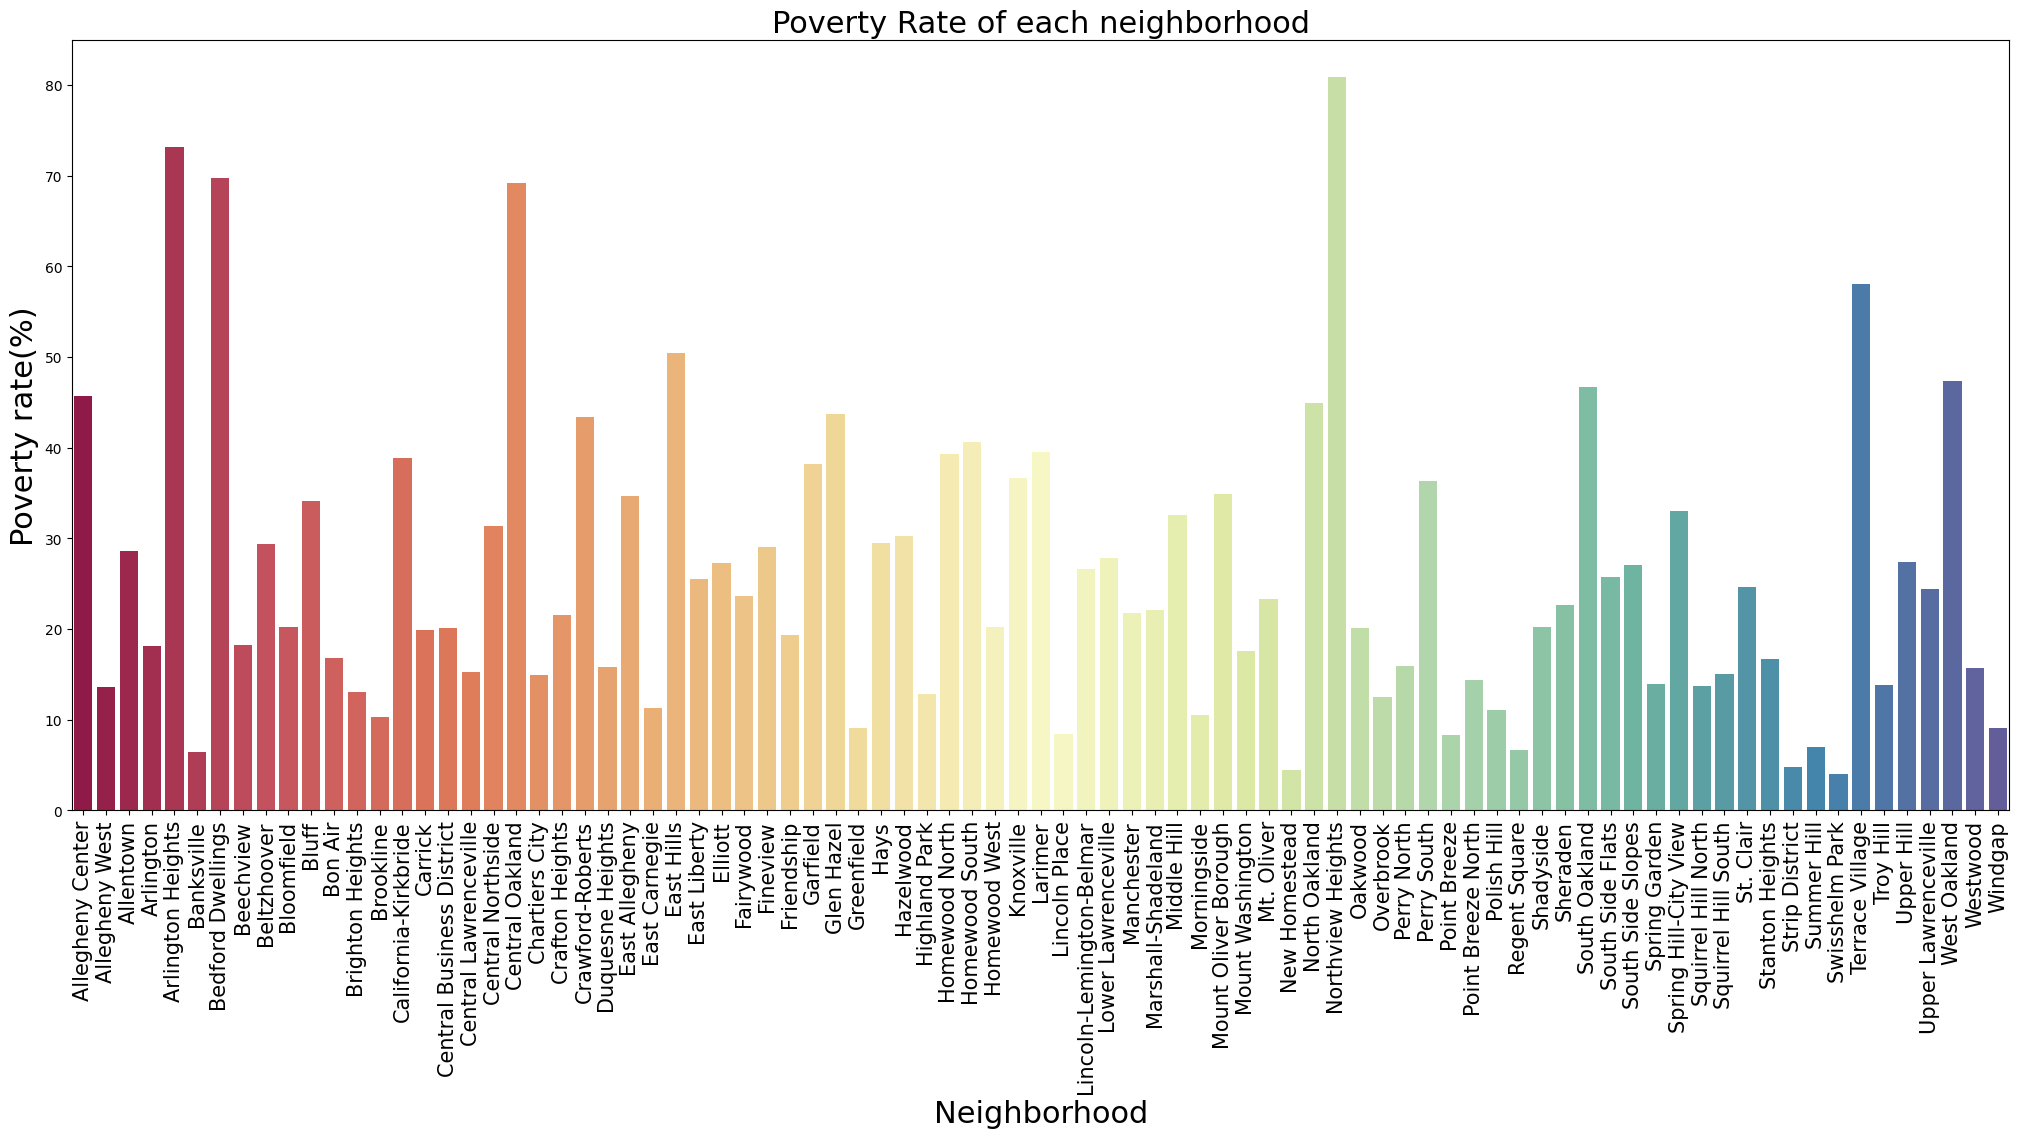

In [ ]:
# Visualize the proverty rate
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,size=15)
plt.title("Poverty Rate of each neighborhood", size=22)
plt.xlabel("Neighborhood",size=22)
plt.ylabel("Poverty Rate",size=22)

g=sns.barplot(x="Neighborhood", y = 'Poverty rate(%)', data = poverty.sort_values(by="Neighborhood"), palette="Spectral")

In [ ]:
poverty = poverty.sort_values(by='Poverty rate(%)')
poverty["Score(Poverty)"] = range(100,100-len(poverty),-1)
poverty.head(10)


,Neighborhood,Population,Income below poverty level:,Poverty rate(%),Score(Poverty)
82,Swisshelm Park,1286.0,51.0,3.965785,100
55,New Homestead,933.0,42.0,4.501608,99
80,Strip District,689.0,33.0,4.789550,98
5,Banksville,3944.0,252.0,6.389452,97
66,Regent Square,1009.0,67.0,6.640238,96
81,Summer Hill,1168.0,81.0,6.934932,95
63,Point Breeze,5333.0,442.0,8.288018,94
45,Lincoln Place,3465.0,293.0,8.455988,93
90,Windgap,1617.0,147.0,9.090909,92
36,Greenfield,7465.0,682.0,9.135968,91


## Final score

In [ ]:
neighborhoods_sorted["Neighborhood"]=neighborhoods_sorted.index
neighborhoods_sorted.index = range(1,len(neighborhoods_sorted)+1)
merge1st = pd.merge(crime[["Neighborhood","Score(Crime)"]],poverty[["Neighborhood","Score(Poverty)"]],on="Neighborhood")
finalDF = pd.merge(merge1st,neighborhoods_sorted,on = "Neighborhood")
finalDF["Final Score"] = (finalDF["Score(Crime)"]+finalDF["Score(Poverty)"]+finalDF["Score(School Enrollment)"])
finalDF.sort_values(by="Final Score")
finalDF = finalDF[["Neighborhood","Score(Crime)","Score(Poverty)","Score(School Enrollment)","Final Score"]]
# neighborhoods_sorted
finalDFTop10 = finalDF.sort_values(by = "Final Score",ascending=False).head(10)
finalDFTop10

,Neighborhood,Score(Crime),Score(Poverty),Score(School Enrollment),Final Score
79,New Homestead,97.5,99,86,282.5
74,Regent Square,89.5,96,76,261.5
78,Swisshelm Park,99.0,100,61,260.0
70,Windgap,84.5,92,83,259.5
61,Lincoln Place,91.5,93,59,243.5
36,Point Breeze,83.5,94,66,243.5
9,Brookline,80.0,90,73,243.0
76,Summer Hill,89.0,95,51,235.0
80,Chartiers City,83.5,78,72,233.5
24,Highland Park,75.5,85,71,231.5


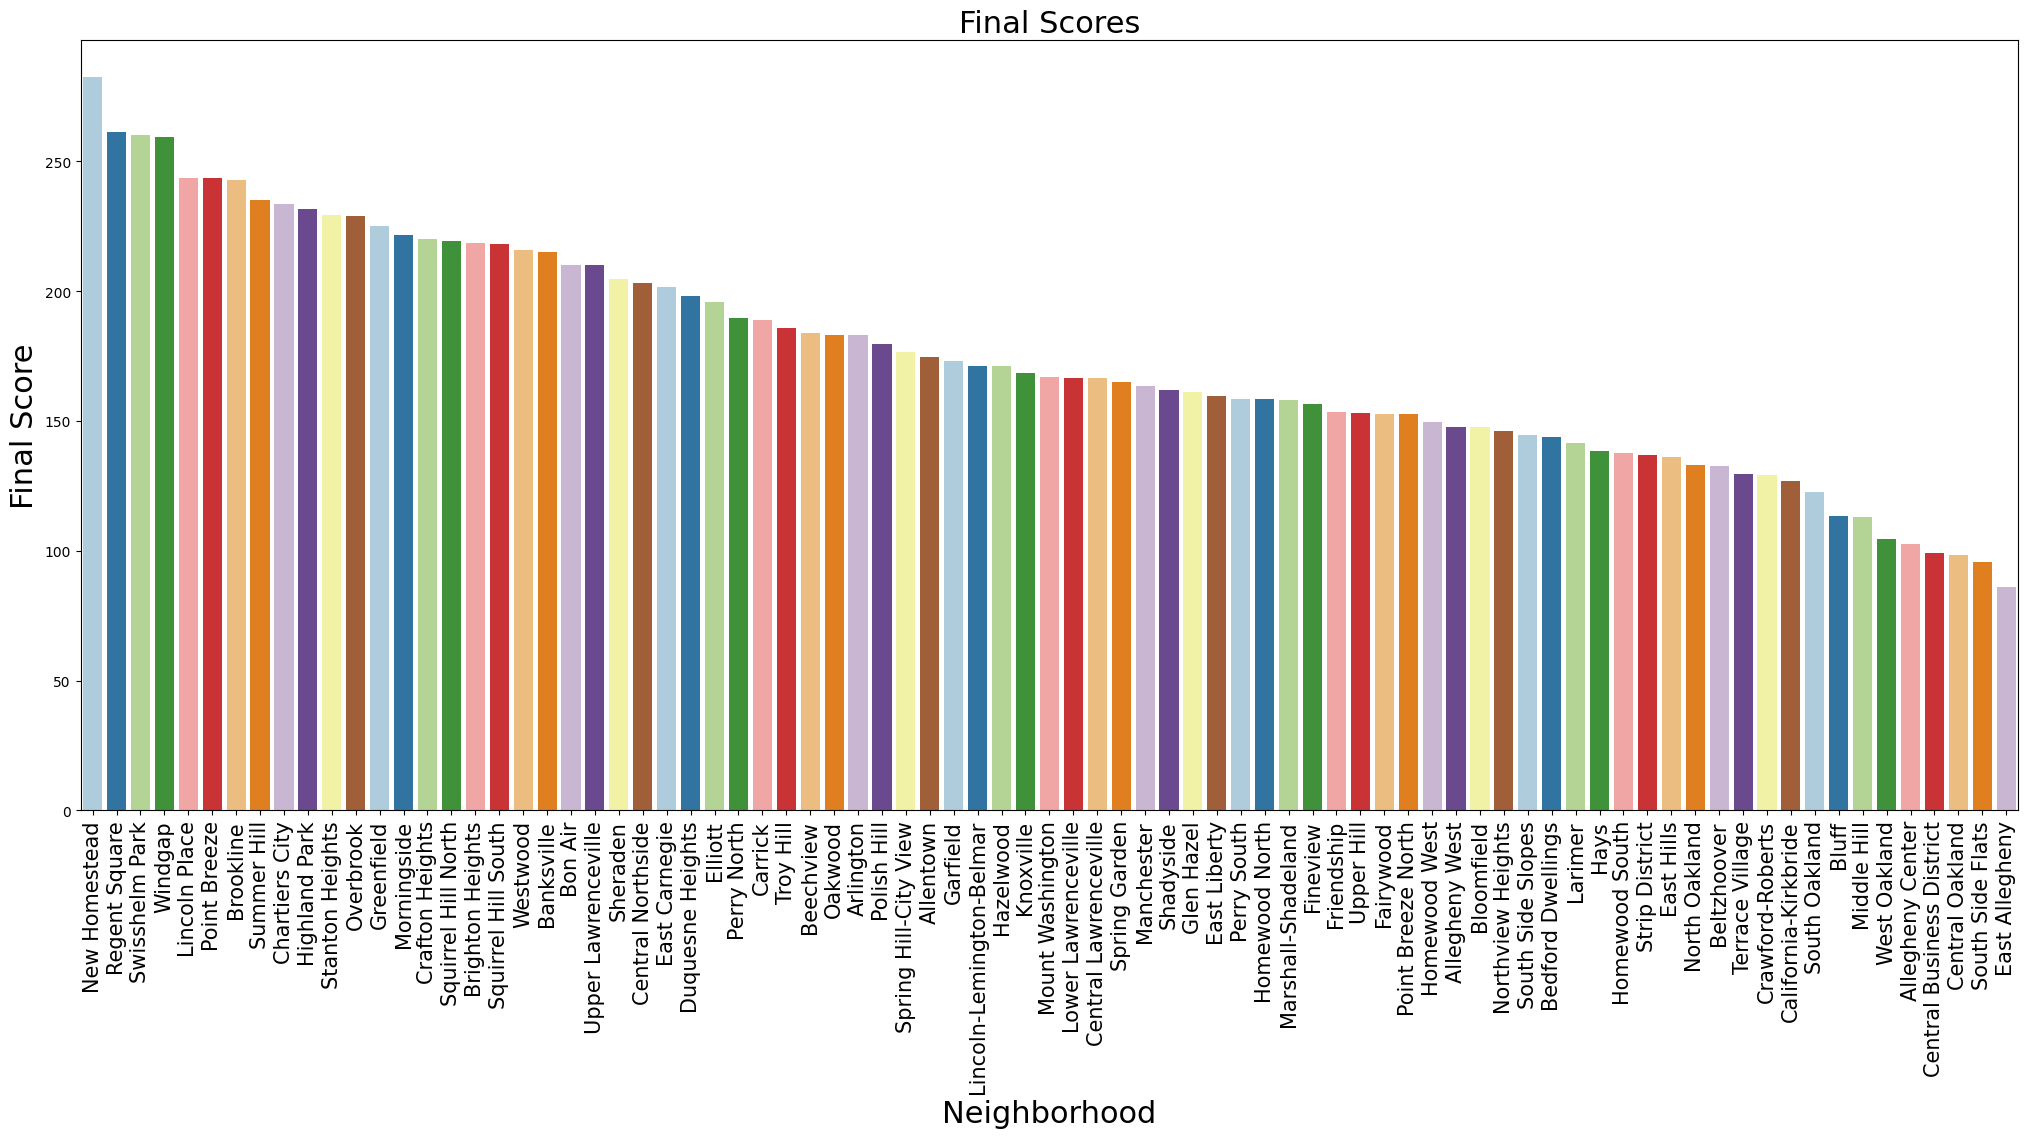

In [ ]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90,size=15)
plt.title("Final Scores", size=22)
plt.xlabel("Neighborhood",size=22)
plt.ylabel("Score",size=22)
g=sns.barplot(x = "Neighborhood", y = "Final Score", data = finalDF.sort_values(by="Final Score",ascending=False), palette="Paired")

## Conclusion

* Rohaan
#### It seems New Homestead is the winner, which means that it is the best neigborhood overall based on crime, poverty levels, and school enrollment. However, it is important to note that New Homestead was rank #15 for school enrollment, yet it still managed to be the best neighborhood after poverty levels and crime were factored in. This means that many of the neighborhoods that ranked highly in terms of school enrollment fared much worse either in poverty levels, crime, or both. An example of this is the Northview Heights neighborhood. It ranked 3rd in terms of school enrollment; however, it is ranked the worst in terms of poverty levels, and it ranks in the middle of the pack in terms of crime rates and arrest rates. This pattern can be explained by the fact that people in poor neighborhoods cannot afford daycare, so they send their children to school instead while they work jobs during the day. They send their kids to school not because they value education over work; rather, they enroll their kids in school in order to not have to worry about them. In this scenario, school is akin to cheap/free daycare that takes care of kids while parents work long and hard to earn some money and survive. The crime and arrest rates are usually higher in poverty-stricken neighborhoods, as is the case with Northview Heights. Looking at the School-Enrollment bar graph, there are a few neighborhoods with 0 Total Enrollment because they have little to no school enrollment because they have a VERY small population. The most extreme example of this is the neighborhood of Chateau which has an estimated population of 3! This reveals a potential flaw in the data collection, for if it is based on the size of the neighborhood, then many of the smaller nenighborhods will be misrepresented and their numbers will be skewed. Chateau clearly has more residents than 3, but since the dataset is based on a survey, there will always be consistencies. The School Enrollment dataset does include Margins of Errors, but it has a limited impact when considering very small values for which the Margin of Error is larger than the Estimated Value.

* Qizhe 
####I don't go to the pittsburgh area often, and I am not familiar with most of the neighborhoods. I thought the winner would be Swisshelm Park or Squirrel hill North since they are both rated well on the crime and poverty metrics, but based on these three metrics we choose, New Homestead is the winner, so it is the best neighborhood overall. In reality, we need much more than just 3 metrics to determine a best neighborhood, and it's hard to find a neighborhood that is perfect, all the neighborhoods have their pros and cons, but we can choose some aspects that we really care and find the "best" in our opinions. 
